In [2]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
# f = lambda x: x[:,[0]] * torch.exp(- torch.abs(x[:,[1]]))
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [68]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 1.38e-01 | test loss: 1.47e-01 | reg: 2.65e+01 : 100%|██| 20/20 [00:09<00:00,  2.09it/s]


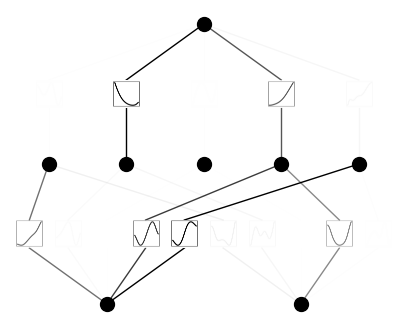

In [69]:
model.plot()

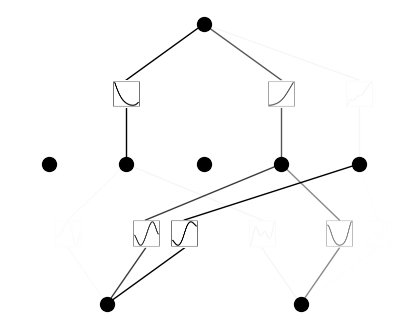

In [70]:
model.prune()
model.plot(mask=True)

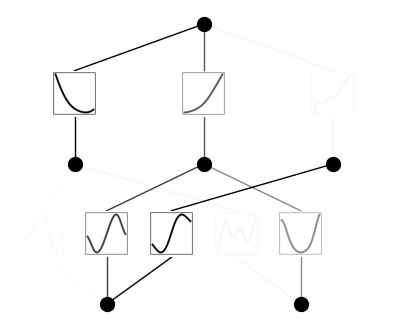

In [71]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [72]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 2.49e-03 | test loss: 2.55e-03 | reg: 8.40e+00 : 100%|██| 50/50 [00:18<00:00,  2.78it/s]


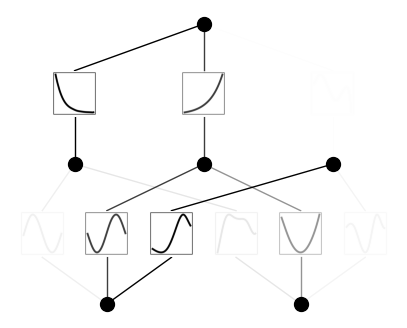

In [73]:
model.plot()

In [74]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9992357492446899
fixing (0,0,1) with sin, r2=0.9999524354934692
fixing (0,0,2) with sin, r2=0.9851243495941162
fixing (0,1,0) with x^4, r2=0.9195665717124939
fixing (0,1,1) with x^2, r2=0.9988430738449097
fixing (0,1,2) with sin, r2=0.9452444911003113
fixing (1,0,0) with tanh, r2=0.9997150301933289
fixing (1,1,0) with exp, r2=0.9999988079071045
fixing (1,2,0) with tanh, r2=0.6910824775695801


In [75]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 5.33e-04 | test loss: 5.30e-04 | reg: 1.15e+01 : 100%|██| 50/50 [00:07<00:00,  7.10it/s]


In [76]:
model.symbolic_formula()[0][0]

0.99*exp(1.01*x_2**2 + 1.0*sin(3.14*x_1)) - 3.05*tanh(0.11*(0.04 - x_2)**4 - 0.51*sin(3.16*x_1) + 3.23) + 3.05